In [109]:
# Useful starting lines
%matplotlib inline

import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load and preprocess data
Note that `ratings` is a sparse matrix that in the shape of (num_items, num_users)

In [110]:
from helpers import load_data

path_dataset = "../data/data_train.csv"
#path_dataset = "../data/movielens100k.csv"
#subsample = [100, 200]
#ratings = load_data(path_dataset,subsample)
ratings = load_data(path_dataset)
print(ratings.shape)

number of items: 10000, number of users: 1000
(10000, 1000)


### Plot the number of ratings per movie and user

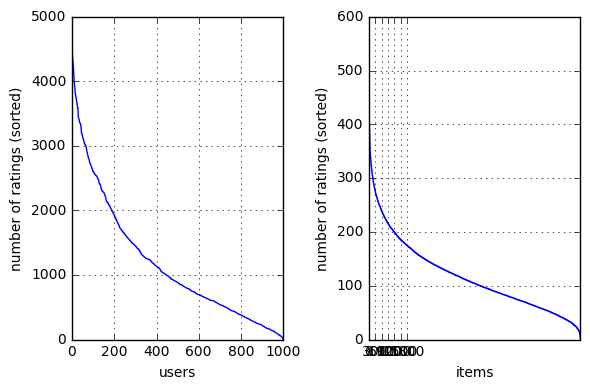

In [111]:
from plots import plot_raw_data

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

Percentage of nz train data:  0.8998, percentage of nz test data:  0.1002


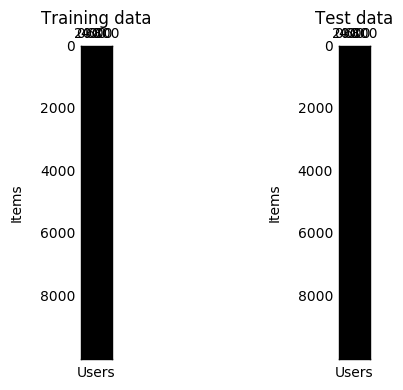

In [ ]:
from plots import plot_train_test_data
from our_helpers import split_data

valid_ratings, train, test = split_data(
    ratings, num_items_per_user, num_users_per_item, min_num_ratings=10, p_test=0.1)
plot_train_test_data(train, test)

## Cross validation of methods

In [ ]:
from optimization_sgd import matrix_factorization_sgd, compute_error
from our_helpers import compute_error2
from helpers import build_index_groups
from data_preprocess import get_user_means, get_item_means, get_global_means, get_unbiased_matrix

gamma = 0.0001 #0.0002 with K=20 worked well
num_features = 20 # K in the lecture notes
lambda_user = 0.1
lambda_item = 0.7
num_epochs = 20 # number of full passes through the train set

nz_train, nz_row_colindices, nz_col_rowindices = build_index_groups(train)
user_means = get_user_means(train, nz_col_rowindices) 
item_means = get_item_means(train, nz_row_colindices)
means = get_global_means(train, nz_train) 
# Noramlize data before doing tests.
methods=['global']
for m in methods:
    train_normalized, train_mean = get_unbiased_matrix(train.copy(),user_means,item_means,means,m)
    user_features_train, item_features_train = matrix_factorization_sgd(train_normalized, gamma, num_features, \
                                                                            lambda_user, lambda_item, num_epochs)
    nz_row, nz_col = test.nonzero()
    nz_test = list(zip(nz_row, nz_col))
    train_prediction = np.dot(item_features_train.T, user_features_train) + train_mean
    plt.matshow(test.todense())
    plt.matshow(train_prediction)
    rmse = compute_error2(test, train_prediction, nz_test)
    print("RMSE on test data with {} normalization: {}.".format(m, rmse))

global ok
learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 245570.72272166226.
iter: 1, RMSE on training set: 2.792192929065041e+19.


In [ ]:
from optimization_sgd import matrix_factorization_bsgd, compute_error

## Create Submission

In [15]:
from optimization_sgd import matrix_factorization_sgd, compute_error

gamma = 0.0001
num_features = 20   # K in the lecture notes
lambda_user = 0.1
lambda_item = 0.7
num_epochs = 1     # number of full passes through the train set
user_features, item_features = matrix_factorization_sgd(ratings, gamma, num_features, lambda_user, lambda_item, num_epochs)

learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.3978255190467372.


## Analyze results

In [15]:
from optimization_sgd import matrix_factorization_sgd, compute_error

gamma = 0.0001
num_features = 20   # K in the lecture notes
lambda_user = 0.1
lambda_item = 0.7
num_epochs = 1     # number of full passes through the train set
user_features, item_features = matrix_factorization_sgd(ratings, gamma, num_features, lambda_user, lambda_item, num_epochs)

learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.3978255190467372.


In [16]:
ratings_full = np.dot(item_features.T,user_features)
print(ratings_full.shape)
print(ratings.shape)

(10000, 1000)
(10000, 1000)


In [18]:
from our_helpers import create_submission
path_output = "../results/submission.csv"
create_submission(path_output, ratings_full)

number of items: 10000, number of users: 1000
